In [5]:
!pip install tensorflow
from tensorflow.keras.datasets import mnist

209.25s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


In [6]:
(trainX, trainy), (testX, testy) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


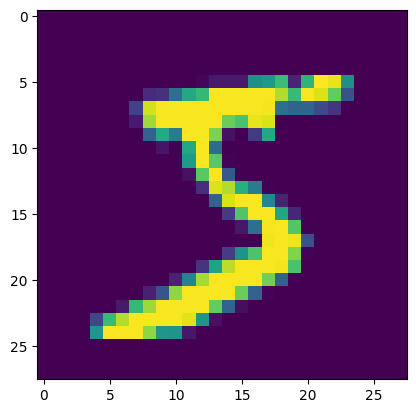

In [8]:
import matplotlib.pyplot as plt
plt.imshow(trainX[0])

In [9]:
trainX.shape

(60000, 28, 28)

In [10]:
trainX = trainX / 255.0
testX = testX / 255.0

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))


/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
import tensorflow as tf

In [14]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
trainy[0]

5

In [17]:
model.fit(trainX, trainy, epochs=10, verbose=1, validation_data=(testX, testy))

Epoch 1/10


2024-04-24 20:13:21.486935: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7155 - loss: 1.0715

2024-04-24 20:13:25.009898: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7156 - loss: 1.0713 - val_accuracy: 0.9071 - val_loss: 0.3242
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9066 - loss: 0.3209 - val_accuracy: 0.9269 - val_loss: 0.2613
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9245 - loss: 0.2572 - val_accuracy: 0.9370 - val_loss: 0.2226
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9357 - loss: 0.2207 - val_accuracy: 0.9407 - val_loss: 0.2013
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9440 - loss: 0.1969 - val_accuracy: 0.9480 - val_loss: 0.1789
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9520 - loss: 0.1692 - val_accuracy: 0.9519 - val_loss: 0.1594
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9562 - loss: 0.1531 - val_accuracy: 0.9554 - val_loss: 0.1482
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9622 - loss: 0.1375 - val_accurac

In [18]:
model.evaluate(testX, testy)

132/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9586 - loss: 0.1428

2024-04-24 20:14:03.569989: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9574 - loss: 0.1421


[0.12335830181837082, 0.9621000289916992]

In [19]:
model.save('mnist_model.h5')

In [21]:

from tensorflow.keras.regularizers import l2


In [22]:
model2 = Sequential()
model2.add(Flatten(input_shape=(28, 28)))
model2.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
model2.add(Dense(712, activation='relu', kernel_regularizer=l2(0.01)))
model2.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model2.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))   
model2.add(Dense(10, activation='softmax'))


/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
model2.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [24]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 712)            │       182,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │        45,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 431,986 (1.65 MB)

 Trainable params: 431,986 (1.65 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model2.fit(trainX, trainy, epochs=10, verbose=1, validation_data=(testX, testy))

Epoch 1/10


2024-04-24 20:26:21.426490: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1866/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6025 - loss: 9.1690

2024-04-24 20:26:26.722801: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6035 - loss: 9.1598 - val_accuracy: 0.9000 - val_loss: 4.9941
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9044 - loss: 4.2994 - val_accuracy: 0.9155 - val_loss: 2.6950
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9177 - loss: 2.3766 - val_accuracy: 0.9241 - val_loss: 1.6086
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9255 - loss: 1.4602 - val_accuracy: 0.9300 - val_loss: 1.0833
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9294 - loss: 1.0130 - val_accuracy: 0.9358 - val_loss: 0.8214
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9360 - loss: 0.7892 - val_accuracy: 0.9391 - val_loss: 0.6942
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9412 - loss: 0.6713 - val_accuracy: 0.9413 - val_loss: 0.6171
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9444 - loss: 0.6080 - val_accurac

In [26]:
model2.evaluate(testX, testy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9413 - loss: 0.5589


[0.5300534963607788, 0.9510999917984009]

In [27]:
model2.save('mnist_model2.h5')